# Import Library

In [4]:
import yfinance as yf
import numpy as np
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt
from ta.volatility import BollingerBands
import math
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import pandas_datareader as wb
from scipy.stats import binom, poisson, expon
import seaborn as sns
from scipy.interpolate import UnivariateSpline
plt.style.use('ggplot')

In [5]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")


## Descriptive statistics

In [70]:
df = yf.download("ROSE-USD")["Adj Close"].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


Date
2020-11-20 00:00:00+00:00   -0.060712
2020-11-21 00:00:00+00:00    0.053877
2020-11-22 00:00:00+00:00    0.100288
2020-11-23 00:00:00+00:00    0.128068
2020-11-24 00:00:00+00:00   -0.116661
                               ...   
2022-10-08 00:00:00+00:00   -0.009087
2022-10-09 00:00:00+00:00    0.011343
2022-10-10 00:00:00+00:00   -0.034560
2022-10-11 00:00:00+00:00   -0.021569
2022-10-12 00:00:00+00:00    0.002754
Name: Adj Close, Length: 692, dtype: float64

In [71]:
#-------Mean with numpy------------
mean = np.mean(df, axis=0) * 100
print(f"Daily Mean: {'%.2f' % mean} %")

# Annualization of the mean return
annual_mean = mean * 252
print(f"Mean Annual: {'%.2f' % annual_mean} %")

#Day mean return-----> monthly mean return
monthly_mean = mean * 21
print(f"Monthly Mean: {'%.2f' % monthly_mean} %")



Daily Mean: 0.38 %
Mean Annual: 95.82 %
Monthly Mean: 7.99 %


In [72]:
#----------Median with numpy------------
median = np.median(df, axis=0) * 100
print(f"Daily Median: {'%.2f' % median} %")

Daily Median: 0.09 %


In [73]:
#-----------Percentile with numpy---------
percentile_10 = np.quantile(df, 0.10, axis=0) * 100
print(f"Percentile 10%: {'%.2f' % percentile_10}%")
percentile_20 = np.quantile(df, 0.20, axis=0) * 100
print(f"Percentile 20%: {'%.2f' % percentile_20}%")
percentile_30 = np.quantile(df, 0.30, axis=0) * 100
print(f"Percentile 30%: {'%.2f' % percentile_30}%")
percentile_40 = np.quantile(df, 0.40, axis=0) * 100
print(f"Percentile 40%: {'%.2f' % percentile_40}%")
percentile_50 = np.quantile(df, 0.50, axis=0) * 100
print(f"Percentile 50%: {'%.2f' % percentile_50}%")
percentile_60 = np.quantile(df, 0.60, axis=0) * 100
print(f"Percentile 60%: {'%.2f' % percentile_60}%")
percentile_70 = np.quantile(df, 0.70, axis=0) * 100
print(f"Percentile 70%: {'%.2f' % percentile_70}%")
percentile_80 = np.quantile(df, 0.80, axis=0) * 100
print(f"Percentile 80%: {'%.2f' % percentile_80}%")
percentile_90 = np.quantile(df, 0.90, axis=0) * 100
print(f"Percentile 90%: {'%.2f' % percentile_90}%")

Percentile 10%: -8.54%
Percentile 20%: -5.39%
Percentile 30%: -3.51%
Percentile 40%: -1.70%
Percentile 50%: 0.09%
Percentile 60%: 1.49%
Percentile 70%: 3.20%
Percentile 80%: 5.63%
Percentile 90%: 9.24%


In [74]:
#-----------Variance with numpy---------
var = np.var(df, axis =0)*100
print(f"Daily Variance: {'%.2f' % var}%")

Daily Variance: 0.66%


In [75]:
#-----------Stadard-Deviation with numpy---------

# Annualizacion var: var_annualy = daily * 252
# Annualizacion std: sqrt(var_ananualy) = sqrt (var daily * 252) = sqrt(var_dayily * sqrt(252)
# And sqrt(var) = sqrt

std = np.std(df, axis=0) * 100
print(f"Daily Volatility: {'%.2f' % std}%")

# Annualization of the mean return
annual_std = std * np.sqrt(252)
print(f"Yearly Volatility: {'%.2f' % annual_std}%")

# Day mean return --> monthly mean return
monthly_std = std * np.sqrt(21)
print(f"Montlhy Volatility: {'%.2f' % monthly_std}%")



Daily Volatility: 8.15%
Yearly Volatility: 129.32%
Montlhy Volatility: 37.33%


In [76]:
# Import several assets
af = yf.download(["BTC-USD", "^GSPC", "ETH-USD", "ROSE-USD"])["Adj Close"].pct_change(1).dropna() 
af

[*********************100%***********************]  4 of 4 completed


,BTC-USD,ETH-USD,ROSE-USD,^GSPC
Date,,,,
2020-11-19 05:00:00+00:00,0.000000,0.000000,0.000000,0.003946
2020-11-20 00:00:00+00:00,0.045138,0.080814,-0.060712,0.000000
2020-11-20 05:00:00+00:00,0.000000,0.000000,0.000000,-0.006793
2020-11-21 00:00:00+00:00,0.001123,0.077965,0.053877,0.000000
2020-11-22 00:00:00+00:00,-0.014603,0.015617,0.100288,0.000000
...,...,...,...,...
2022-10-10 00:00:00+00:00,-0.015681,-0.023640,-0.034560,0.000000
2022-10-10 04:00:00+00:00,0.000000,0.000000,0.000000,-0.007492
2022-10-11 00:00:00+00:00,-0.004705,-0.009108,-0.021569,0.000000


In [77]:
# Variance Covariance matrix
mat = np.cov(af, rowvar=False)
pd.DataFrame(mat, columns=af.columns, index=af.columns)

,BTC-USD,ETH-USD,ROSE-USD,^GSPC
BTC-USD,8.959827e-04,9.506655e-04,1.007612e-03,-1.640046e-08
ETH-USD,9.506655e-04,1.581422e-03,1.352999e-03,-5.364283e-08
ROSE-USD,1.007612e-03,1.352999e-03,3.938851e-03,-7.290922e-08
^GSPC,-1.640046e-08,-5.364283e-08,-7.290922e-08,5.446162e-05


In [78]:
# Covariance 
mat [0] [1]

# X and Y is +0 /// they are related // when X up Y up
# X and Y is -0 // they are not related // when X up Y down

0.000950665496818439

In [79]:
# Correlation matrix
af.corr()

,BTC-USD,ETH-USD,ROSE-USD,^GSPC
BTC-USD,1.000000,0.798646,0.536363,-0.000074
ETH-USD,0.798646,1.000000,0.542112,-0.000183
ROSE-USD,0.536363,0.542112,1.000000,-0.000157
^GSPC,-0.000074,-0.000183,-0.000157,1.000000


In [80]:
# Covariance matrix
af.cov()

,BTC-USD,ETH-USD,ROSE-USD,^GSPC
BTC-USD,8.959827e-04,9.506655e-04,1.007612e-03,-1.640046e-08
ETH-USD,9.506655e-04,1.581422e-03,1.352999e-03,-5.364283e-08
ROSE-USD,1.007612e-03,1.352999e-03,3.938851e-03,-7.290922e-08
^GSPC,-1.640046e-08,-5.364283e-08,-7.290922e-08,5.446162e-05


# Probability and Bollinger Bands

In [81]:
len(rs[rs["Adj Close"]>0])

673

In [82]:
# Compute the chance of a incrase
p_increase = len(rs[rs["Adj Close"]>0]) / len(rs) * 100

# Compute the chance of a decrease
p_decrease = len(rs[rs["Adj Close"]<0]) / len(rs) * 100

# %Increase + %Decrease cloase to one but not mandatory equal 1
print(f"Weights: \t Increase: {'%.2f' % p_increase} \t Decrease: {'%.2f' % p_decrease}")

Weights: 	 Increase: 100.00 	 Decrease: 0.00


In [83]:
rs = yf.download("ROSE-USD").pct_change(1).dropna()
rs

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-20 00:00:00+00:00,-0.438436,-0.368474,-0.101926,-0.060712,-0.060712,-0.552848
2020-11-21 00:00:00+00:00,-0.060712,-0.072002,-0.027011,0.053877,0.053877,-0.073515
2020-11-22 00:00:00+00:00,0.053877,0.055213,0.079303,0.100288,0.100288,-0.337993
2020-11-23 00:00:00+00:00,0.100262,0.281897,0.092618,0.128068,0.128068,1.321498
2020-11-24 00:00:00+00:00,0.130739,-0.025777,0.037271,-0.116661,-0.116661,-0.292719
...,...,...,...,...,...,...
2022-10-08 00:00:00+00:00,-0.004656,-0.010590,-0.007474,-0.009087,-0.009087,-0.442570
2022-10-09 00:00:00+00:00,-0.008593,0.005039,0.006203,0.011343,0.011343,0.029858
2022-10-10 00:00:00+00:00,0.010719,0.007033,-0.022606,-0.034560,-0.034560,0.532436


[*********************100%***********************]  1 of 1 completed


C:\Users\Gato\AppData\Local\Temp\ipykernel_9952\1957768985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs["return"] = rs["Adj Close"].pct_change(1).dropna()
C:\Users\Gato\AppData\Local\Temp\ipykernel_9952\1957768985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs["bb_bbm"] = indicator_bb.bollinger_mavg()
C:\Users\Gato\AppData\Local\Temp\ipykernel_9952\1957768985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

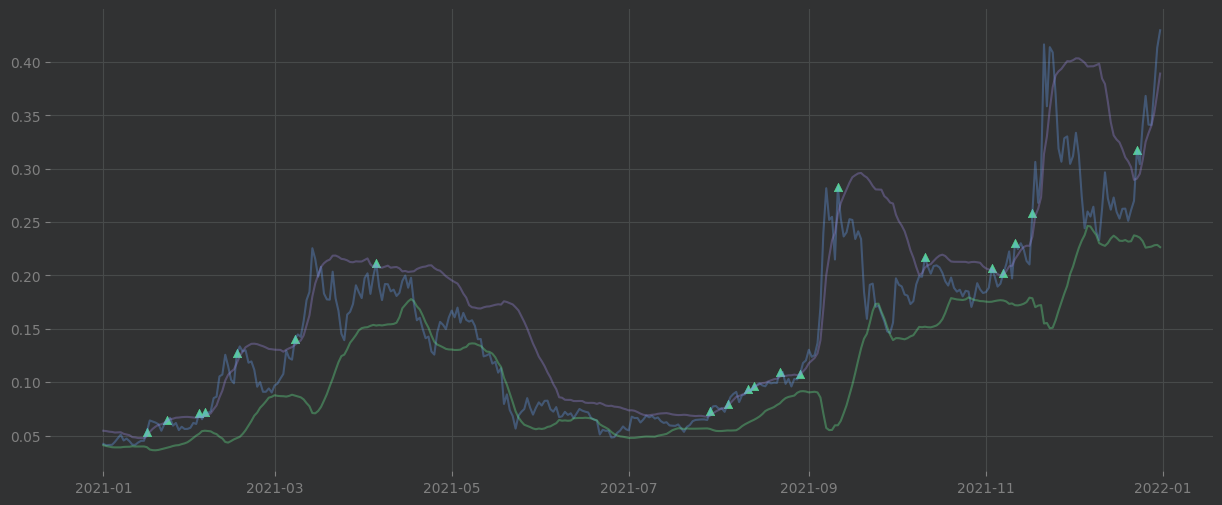

In [6]:
rs = yf.download("ROSE-USD")[["Adj Close"]]
rs["return"] = rs["Adj Close"].pct_change(1).dropna()
indicator_bb = BollingerBands(close=rs["Adj Close"], window=20, window_dev=1.5)
rs["bb_bbm"] = indicator_bb.bollinger_mavg()
rs["bb_bbh"] = indicator_bb.bollinger_hband()
rs["bb_bbl"] = indicator_bb.bollinger_lband()
rs["Adj Close Yesterday"] = rs["Adj Close"].shift(1)
rs["bbh Yesterday"] = rs["bb_bbh"].shift(1)
rs = rs.dropna()
n = 10
dates = []
returns = []
for i in range(len(rs) - n - 1):
    row = rs.iloc[i:i+1,:]
    
    if (row["Adj Close Yesterday"].values[0] < row["bbh Yesterday"].values[0]) and\
    (row["Adj Close"].values[0] > row["bb_bbh"].values[0]):
        dates.append(row.index[0])
        ret = []
        for day in range(1,n):
            ret.append(rs.iloc[i+day: i+1+day,:]["return"].values[0])
        returns.append(ret)
    rs_returns = pd.DataFrame(returns).cumsum(axis=1)
idx = dates
year = "2021"

plt.figure(figsize=(15, 6))
plt.scatter(rs.loc[idx].loc[year].index, rs.loc[idx]["Adj Close"].loc[year], color="#57CE95", marker="^")
plt.plot(rs["Adj Close"].loc[year].index, rs["Adj Close"].loc[year], alpha=0.35)
plt.plot(rs["bb_bbl"].loc[year].index, rs["bb_bbl"].loc[year], alpha=0.35)
plt.plot(rs["bb_bbh"].loc[year].index, rs["bb_bbh"].loc[year], alpha=0.35)
plt.show()
rs = rs.copy()

In [85]:
for i in range(n-1):
    g = rs_returns.iloc[:,i:i+1].values - 0.001
    p_increase = len(g[g>0]) / len(g) * 100
    p_decrease = len(g[g<0]) / len(g) * 100
    
    print(f"Weights day {i+1}: \t Increase: {'%.2f' % p_increase} \t Decrease: {'%.2f' % p_decrease}")
print(f" ")

p_increase = len(rs[rs["return"]>0])/len(rs)*100
p_decrease = len(rs[rs["return"]<0])/len(rs)*100
print(f"Weights: \t Increase: {'%.2f' % p_increase} \t Decrease: {'%.2f' % p_decrease}")

Weights day 1: 	 Increase: 60.71 	 Decrease: 39.29
Weights day 2: 	 Increase: 57.14 	 Decrease: 42.86
Weights day 3: 	 Increase: 53.57 	 Decrease: 46.43
Weights day 4: 	 Increase: 57.14 	 Decrease: 42.86
Weights day 5: 	 Increase: 57.14 	 Decrease: 42.86
Weights day 6: 	 Increase: 64.29 	 Decrease: 35.71
Weights day 7: 	 Increase: 57.14 	 Decrease: 42.86
Weights day 8: 	 Increase: 64.29 	 Decrease: 35.71
Weights day 9: 	 Increase: 60.71 	 Decrease: 39.29
 
Weights: 	 Increase: 50.37 	 Decrease: 49.63


# Bollinger Band class

[*********************100%***********************]  1 of 1 completed


C:\Users\Gato\AppData\Local\Temp\ipykernel_34592\3685483587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt["return"] = bt["Adj Close"].pct_change(1).dropna()
C:\Users\Gato\AppData\Local\Temp\ipykernel_34592\3685483587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt["bb_bbl"] = indicator_bb.bollinger_lband()
C:\Users\Gato\AppData\Local\Temp\ipykernel_34592\3685483587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

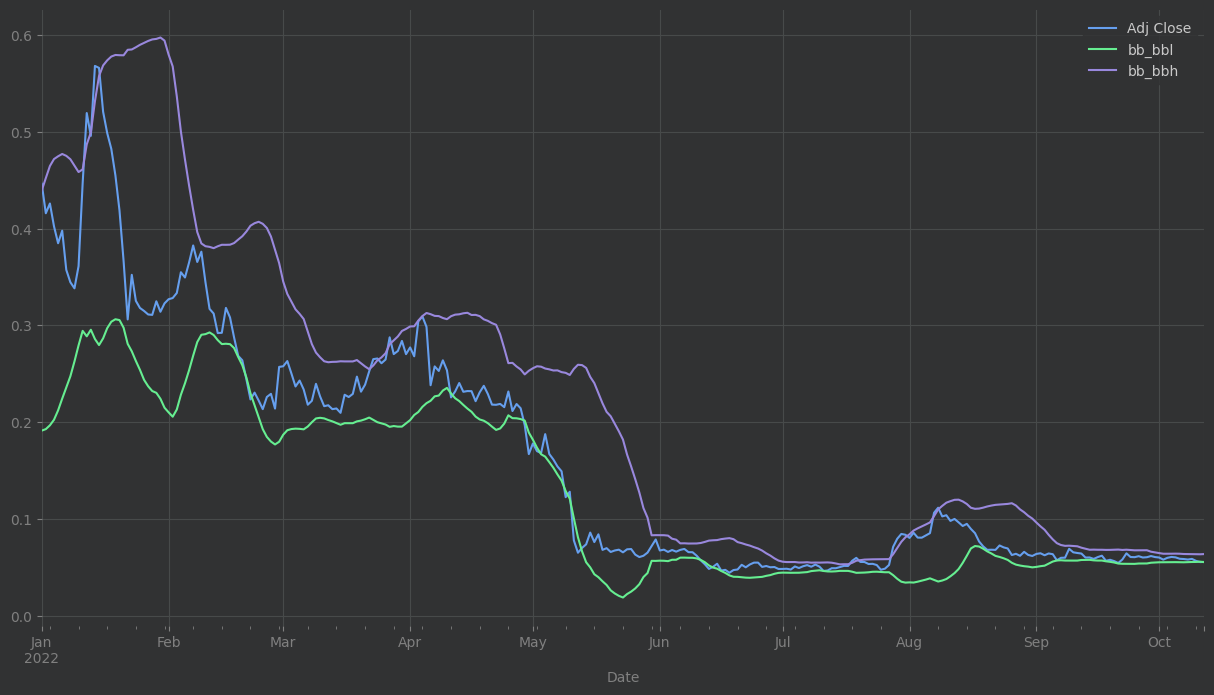

In [86]:
from ta.volatility import BollingerBands
bt = yf.download("ROSE-USD")[["Adj Close"]]
bt["return"] = bt["Adj Close"].pct_change(1).dropna()
indicator_bb = BollingerBands(close=bt["Adj Close"], window=20, window_dev=2)
bt["bb_bbl"] = indicator_bb.bollinger_lband()
bt["bb_bbh"] = indicator_bb.bollinger_hband()
bt[["Adj Close", "bb_bbl", "bb_bbh"]].loc["2022"].plot(figsize=(15,8))
bt = bt.copy()
#continue



# VaR (Value at Risk)

In [87]:
af = yf.download("BTC-USD").pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: ylabel='Density'>

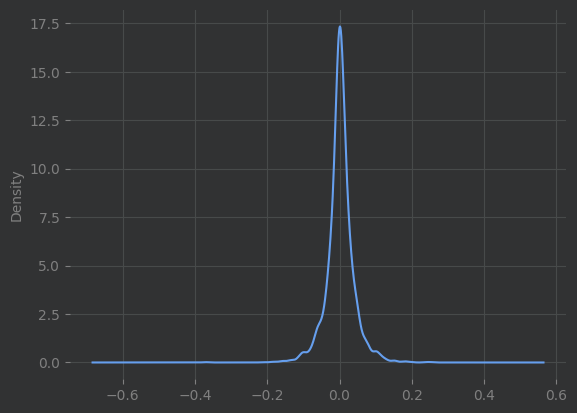

In [88]:
af["Close"].plot(kind="kde")

In [89]:
VaR = np.quantile(af["Adj Close"], 0.05)*100
print(f"Value at risk: {'%.2f' % VaR} %")

Value at risk: -6.01 %


# Exercise: Analyze the stop loss and take profit

In [90]:
# Import the data
df = yf.download("GOOG")

# Compute variation Max and Min by day 
df["high"] = (df["High"] - df["Open"])/df["Open"]
df["low"] = (df["Low"] - df["Open"])/df["Open"]

[*********************100%***********************]  1 of 1 completed


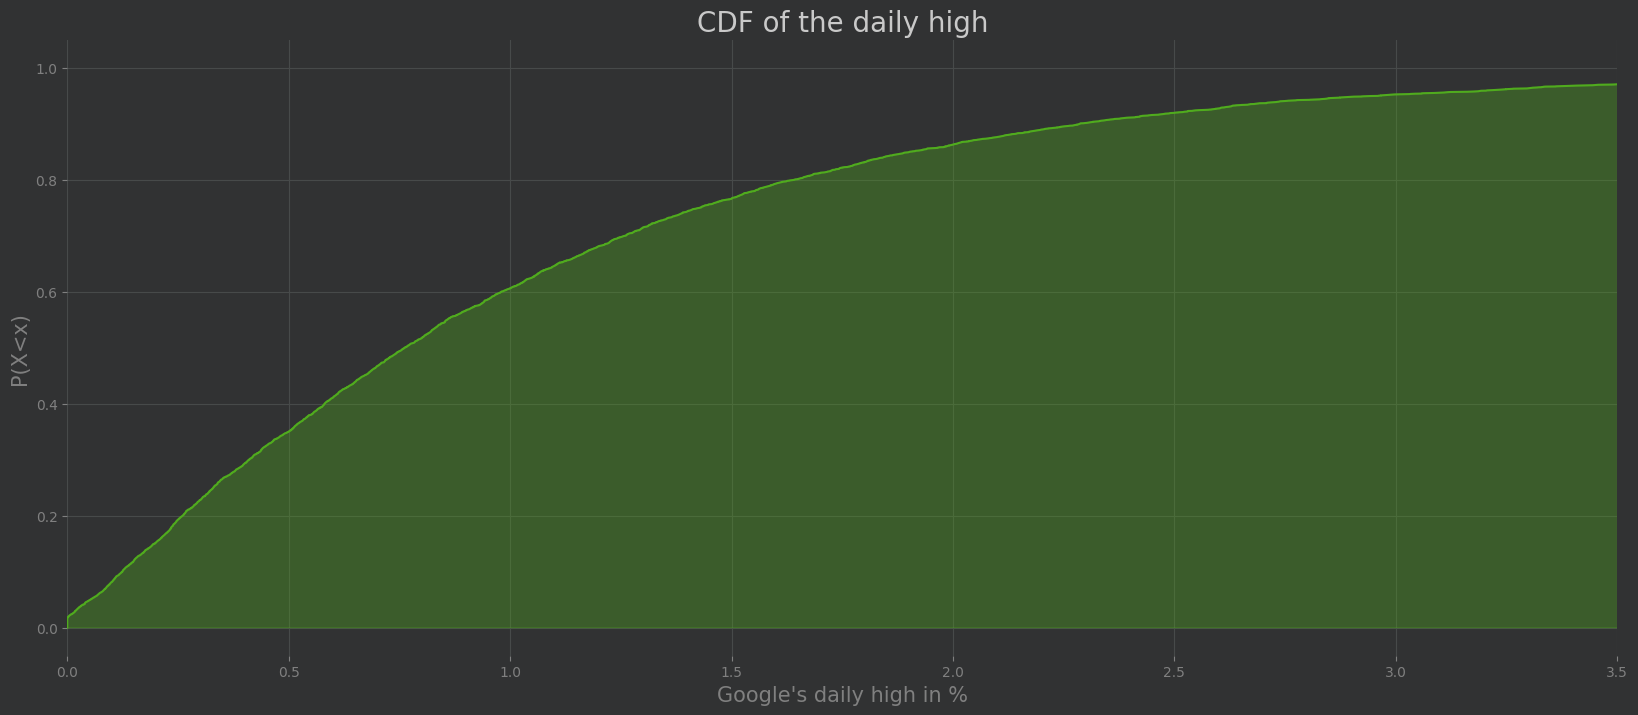

In [91]:
# -------- Prepare the data ----------
# Remove missing values and order them
dfh = df[["high"]].dropna().sort_values(by="high", ascending=True)

# Weight for each value
dfh["probability"] = 1/len(dfh)


# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Google's daily high in %", size=15)

# Put a title
plt.title("CDF of the daily high", size=20)

# Plot the line of the CDF
plt.plot(dfh["high"]*100, dfh["probability"].cumsum(), color="#50AB1E")

# Plot the area of the CDF
plt.fill_between(dfh["high"]*100,0, dfh["probability"].cumsum(), color="#50AB1E", alpha=0.35)

# Define x limits
plt.xlim([0,3.5])

# Plot the graph
plt.show()

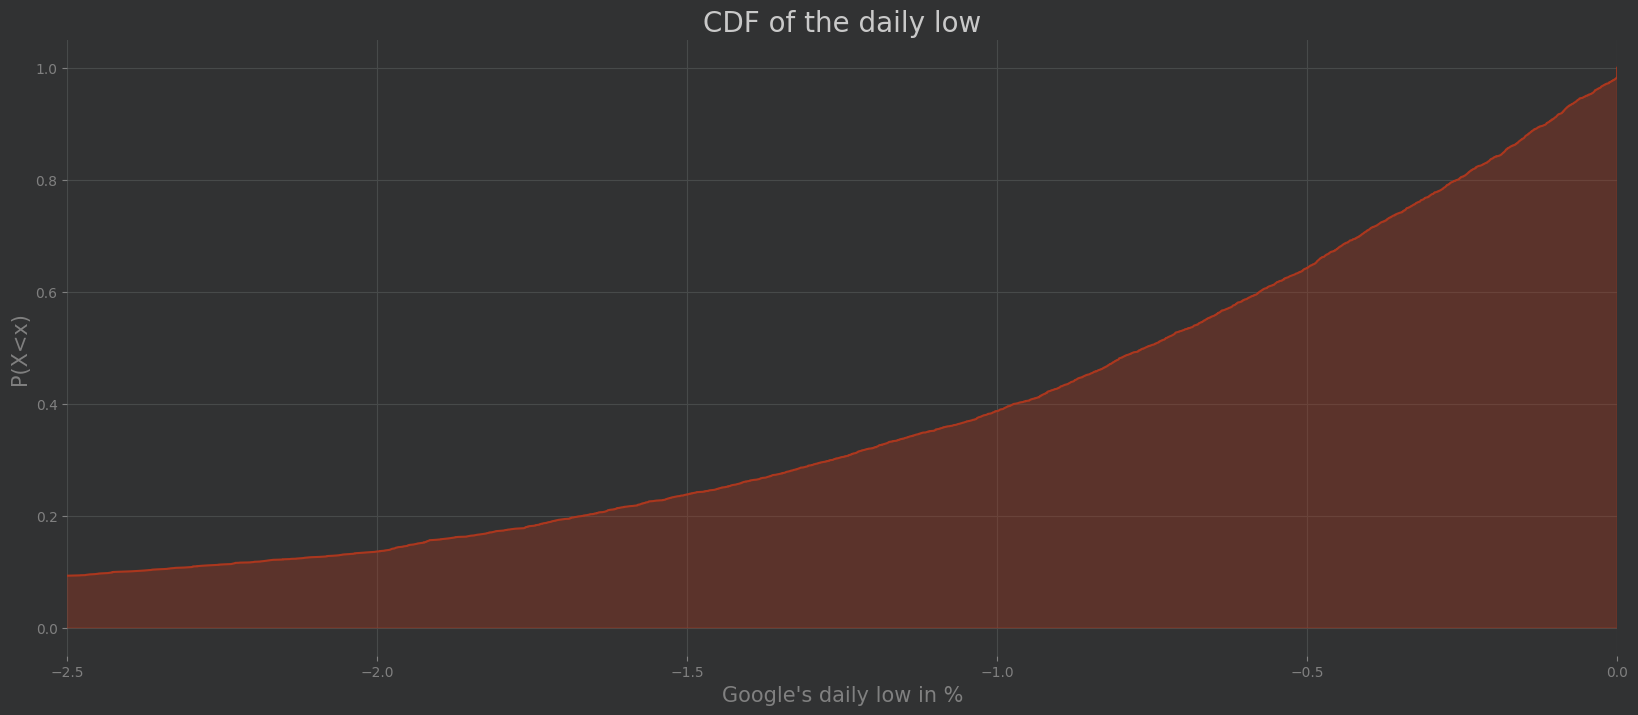

In [92]:
# -------- Prepare the data ----------

# Remove missing values and order them
dfl = df[["low"]].dropna().sort_values(by="low", ascending=True)

# Weight for each value
dfl["probability"] = 1/len(dfl)


# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Google's daily low in %", size=15)

# Put a title
plt.title("CDF of the daily low", size=20)

# Plot the line of the CDF
plt.plot(dfl["low"]*100, dfl["probability"].cumsum(), color="#AB371E")

# Plot the area of the CDF
plt.fill_between(dfl["low"]*100,0, dfl["probability"].cumsum(), color="#AB371E", alpha=0.35)

# Define x limits
plt.xlim([-2.5, 0])

# Plot the graph
plt.show()

# Binomial Distribution

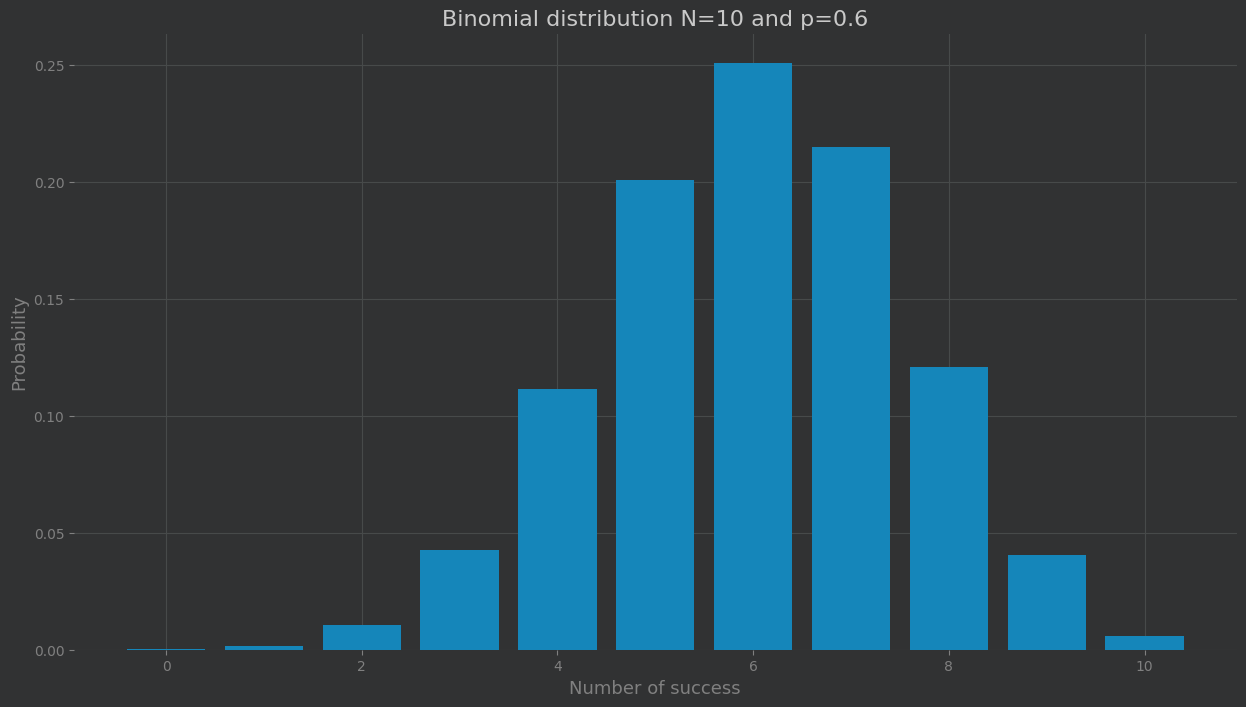

In [93]:
# ------------ Initialiaze distribution setting ---------------
# Number of iterations 
n = 10

# Probability of success
p = 0.6


# ------------ Compute the probability ---------------
# List of possible number of success
nb_success = list(range(n + 1))

# list of pmf values
proba = [binom.pmf(b, n, p) for b in nb_success ]


# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.bar(nb_success, proba, color="#1586BA")

# Give x/y labels and a title
plt.title(f"Binomial distribution N={n} and p={p}", size=16)
plt.xlabel("Number of success", size=13)
plt.ylabel("Probability", size=13)

plt.show()

# Poisson Distribution

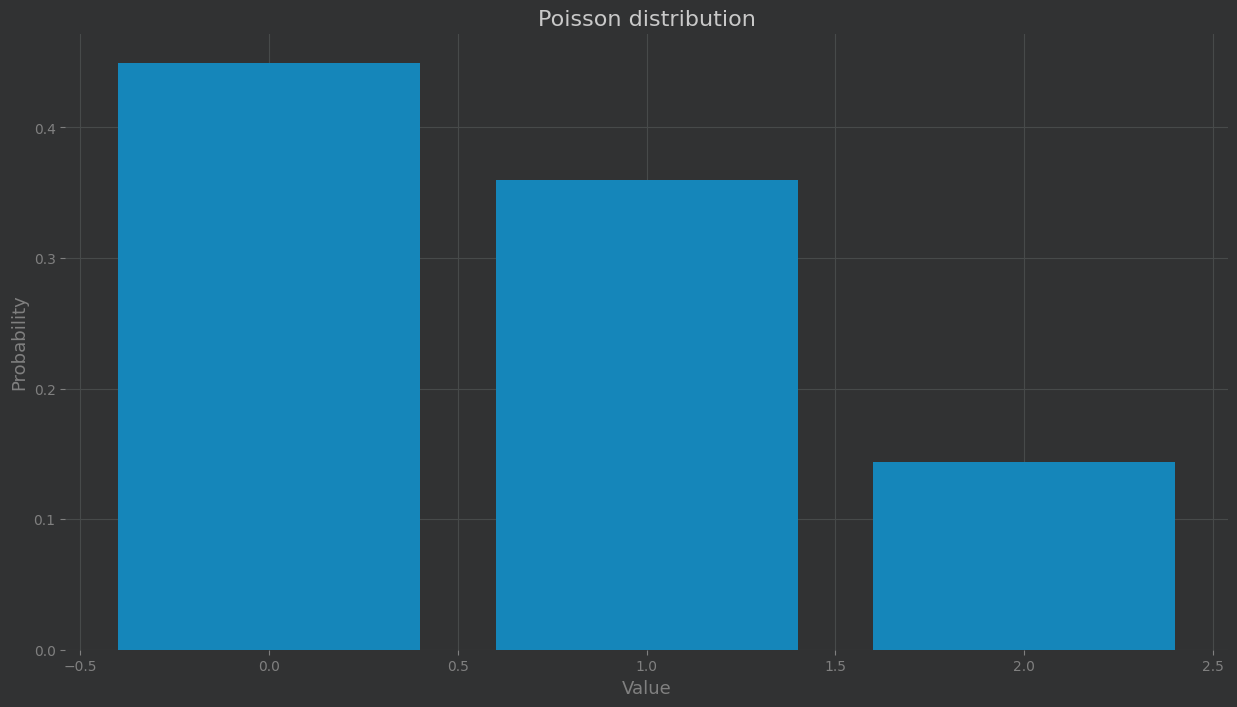

In [94]:
# ------------ Simulate Poisson Process ---------------
# Set lambda parameter
l = 0.8

# Find the discrete values which cover the domain
x = np.arange(poisson.ppf(0.01, l),
             poisson.ppf(0.99, l))

# Compute the proba of each value
proba = poisson.pmf(x, l)

# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.bar(x, proba, color="#1586BA")

# Give x/y labels and a title
plt.title(f"Poisson distribution", size=16)
plt.xlabel("Value", size=13)
plt.ylabel("Probability", size=13)

plt.show()

# Continuous uniform Law

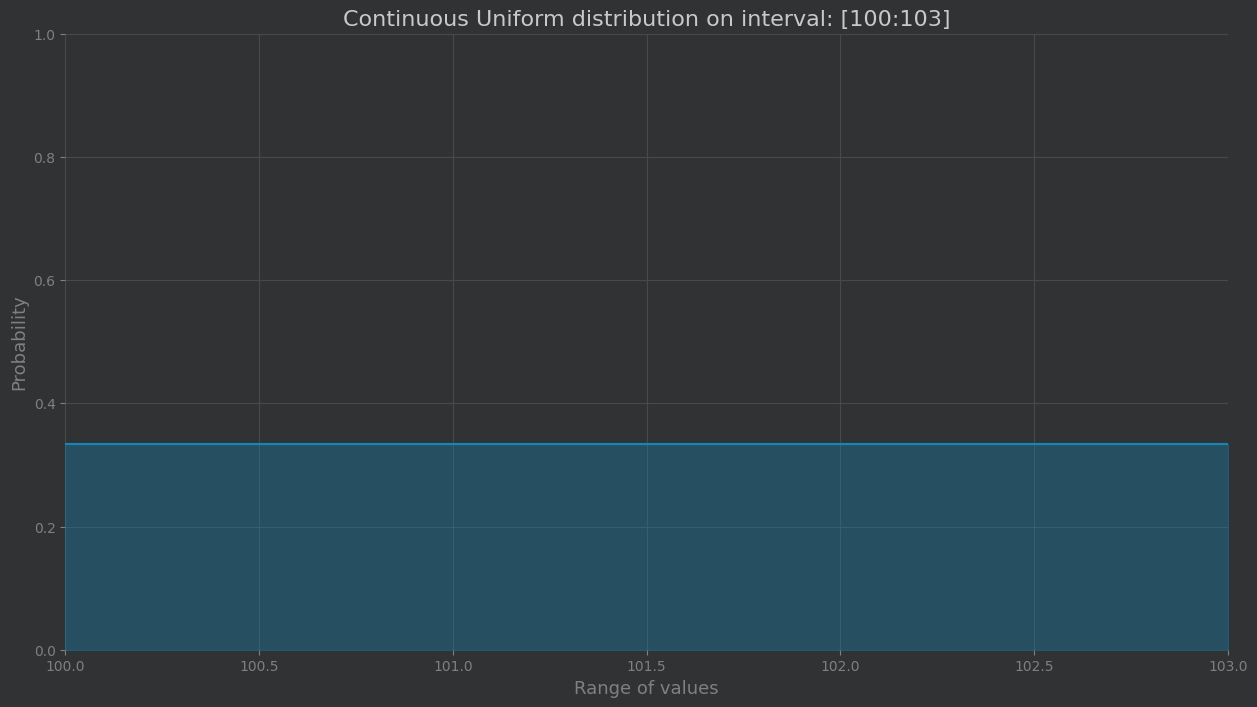

In [95]:
# ------------ Initialiaze distribution setting ---------------
a = 100
b = 103

# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.axhline(1/(b-a), color="#1586BA")
plt.fill_between([a,b],0, 1/(b-a), color="#1586BA", alpha=0.35)

# Give x/y labels and a title
plt.title(f"Continuous Uniform distribution on interval: [{a}:{b}]", size=16)
plt.xlabel("Range of values", size=13)
plt.ylabel("Probability", size=13)

#
plt.ylim([0,1])
plt.xlim([a,b])


plt.show()

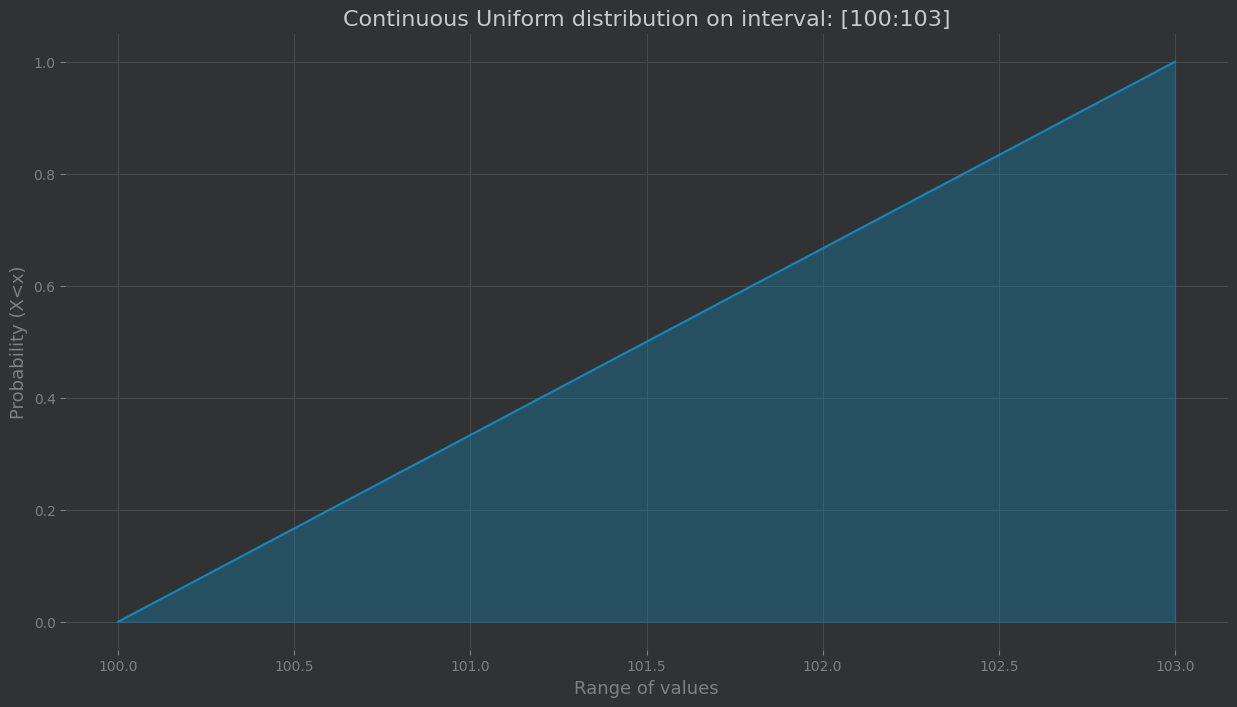

In [96]:
# ------------ Initialiaze distribution setting ---------------
a = 100
b = 103

domain = np.linspace(a,b,50)
p = [(x-a)/(b-a) for x in domain]
# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.plot(domain, p,color="#1586BA")
plt.fill_between(domain,0, p, color="#1586BA", alpha=0.35)

# Give x/y labels and a title
plt.title(f"Continuous Uniform distribution on interval: [{a}:{b}]", size=16)
plt.xlabel("Range of values", size=13)
plt.ylabel("Probability (X<x)", size=13)

#
# plt.ylim([0,1])
# plt.xlim([a,b])


plt.show()

# Exponential distribution

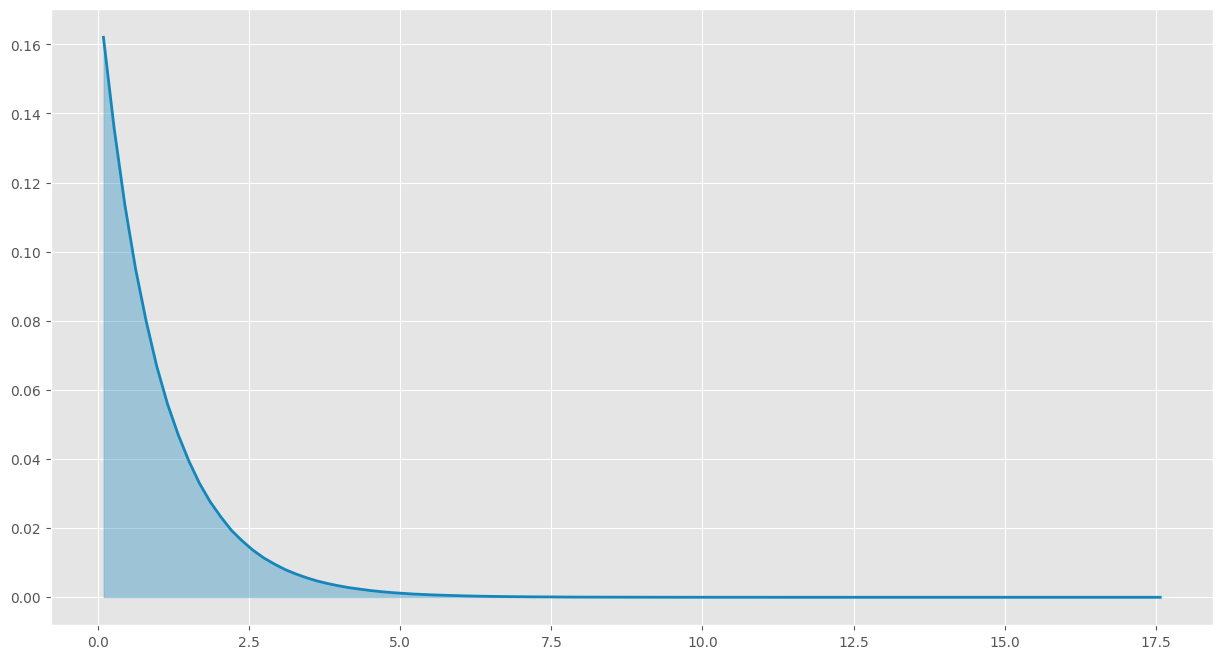

In [99]:
N = 10000000
n = N//100000
s = np.random.exponential(scale=1, size=(N,)) # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.figure(figsize=(15,8))
plt.plot(x, f(x)/N, color="#1586BA", linewidth=2)
plt.fill_between(x,0, f(x)/N, color="#1586BA", alpha=0.35)

plt.show()

<AxesSubplot: ylabel='Density'>

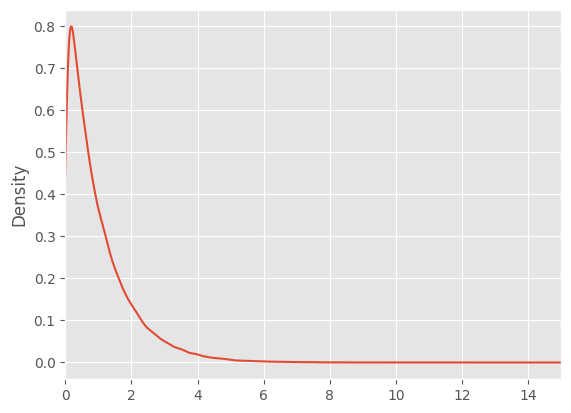

In [100]:
# ------------ Simulate realization coming from a exponential law ---------------
arr = np.random.exponential(scale=1, size=(100000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

df["sim"].plot(kind="kde", xlim=[0,15])

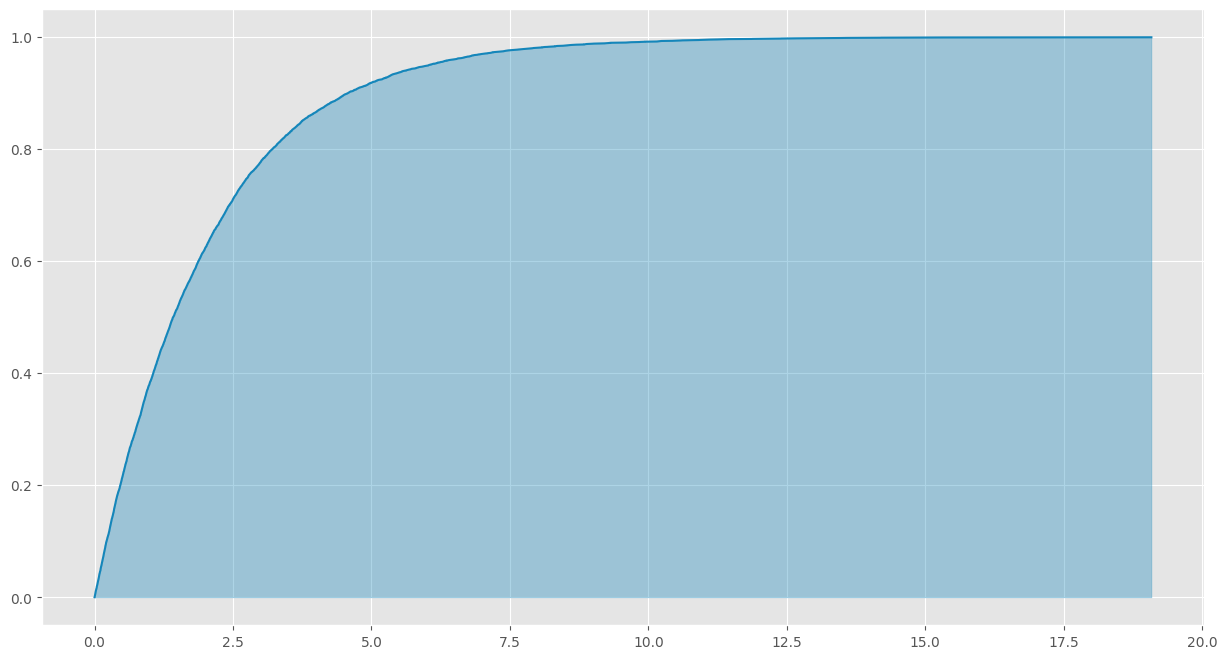

In [101]:
arr = np.random.exponential(scale=2, size=(10000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

plt.figure(figsize=(15,8))
plt.plot(df["sim"], df["probability"].cumsum(), color="#1586BA")
plt.fill_between(df["sim"],0, df["probability"].cumsum(), color="#1586BA", alpha=0.35)

# The normal distribution

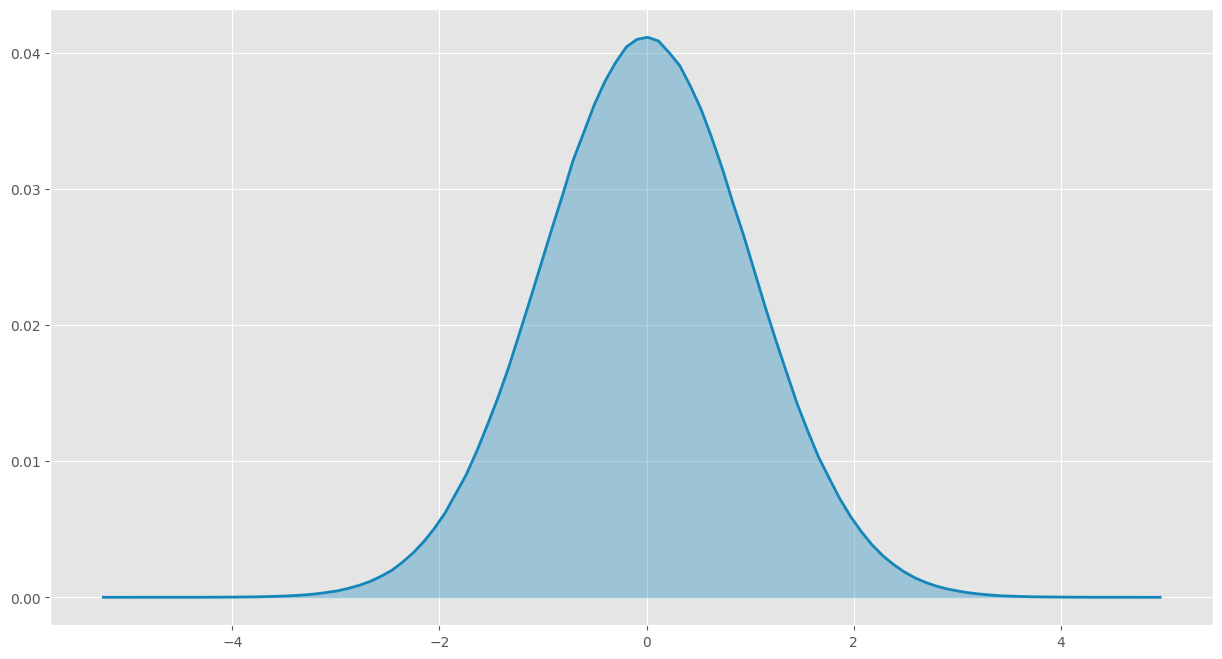

In [102]:
N = 10000000
n = N//100000
s = np.random.normal(scale=1, size=(N,)) # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.figure(figsize=(15,8))
plt.plot(x, f(x)/N, color="#1586BA", linewidth=2)
plt.fill_between(x,0, f(x)/N, color="#1586BA", alpha=0.35)

plt.show()

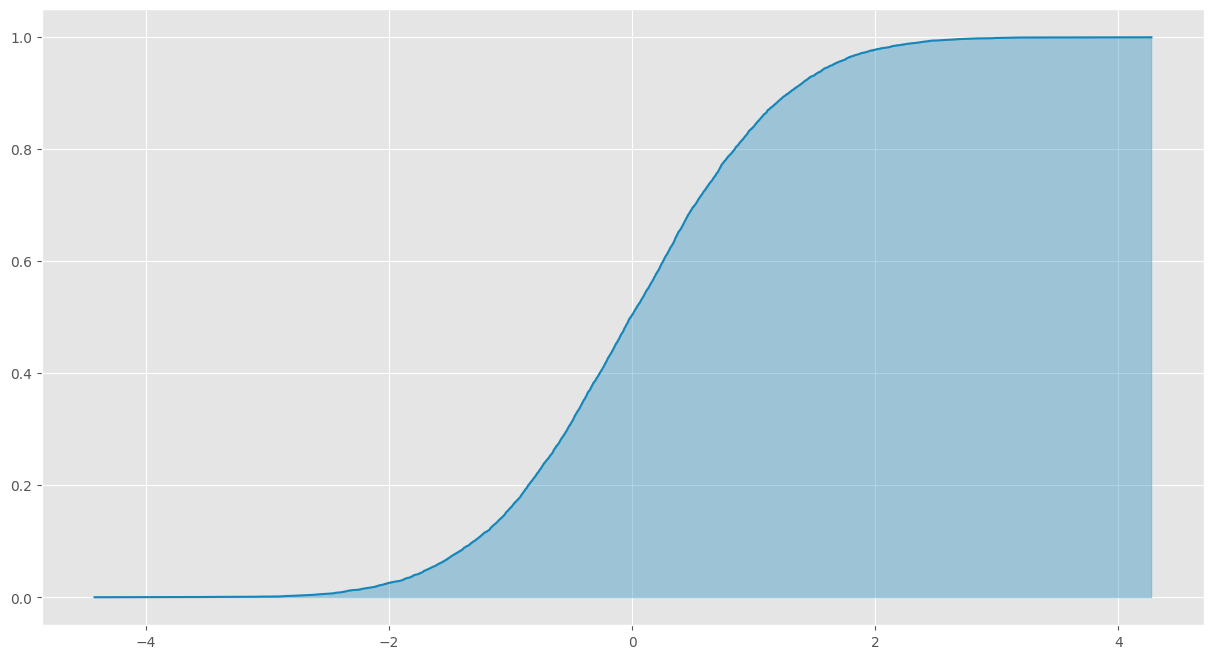

In [103]:
#plt.plot(np.random.exponential(scale=2, size=(1000)))

arr = np.random.normal(scale=1, size=(10000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

plt.figure(figsize=(15,8))
plt.plot(df["sim"], df["probability"].cumsum(), color="#1586BA")
plt.fill_between(df["sim"],0, df["probability"].cumsum(), color="#1586BA", alpha=0.35)